### CH03 비지도 학습과 데이터 전처리
#### 1-1-1 비지도 학습이란?
    우리가 예측해야 하는 값(target)의 출력값이 없이 입력 데이터 만을 이용하여 학습 알고리즘을 가르쳐야 하는 모든 종류의 머신러닝
#### 1-1-2 비지도 학습의 종류
    비지도 변환(unsupervised transformation)과 군집(clustering)
##### 비지도 변환(unsupervised transformation)
     A. 비지도 변환은 데이터를 새롭게 표현하여, 
     B. 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘이다.
##### 사용 분야
    많이 사용되는 분야는 특성이 많은 고차원 데이터의 특성(feature)의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법인 차원 축소(dimensionality reduction)이다.
##### 현재 어려운 부분
     (가) 알고리즘이 좋은지 나쁜지를 학습한 내용에 대한 평가
     (나) 우리가 뭔가 원하는 것을 알려줄 수 없다.
           -> 비지도 학습 알고리즘은 데이터 과학자가 데이터를 잘 이해하고 싶을 때 분석 단계에서 많이 사용

* 소셜 미디어에서 선거, 총기, 팝스타 같은 주제로 일어나는 토론을 추적, 텍스트 문서에서 주제를 추출
* 군집 알고리즘(Clustering)
데이터를 비슷한 것끼리 그룹으로 묶는 것.

#### 1-1-3 데이터 전처리와 스케일 조정
      * 신경망과 서포트벡터 머신(SVM)같은 알고리즘은 데이터 스케일(범위)에 매우 민감하다.
      * 이런 알고리즘에 맞게 특성(feature)를 조정한다. 각 feature별로 변경한다.

In [1]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


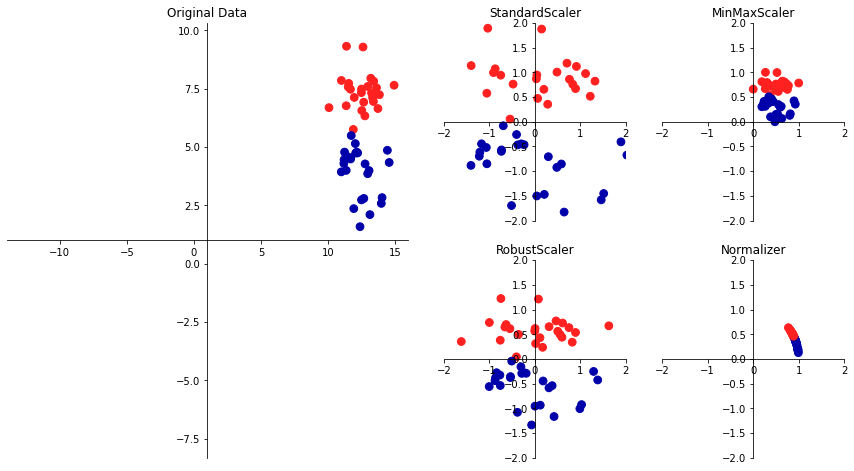

In [2]:
import mglearn
mglearn.plots.plot_scaling()

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [4]:
### 한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


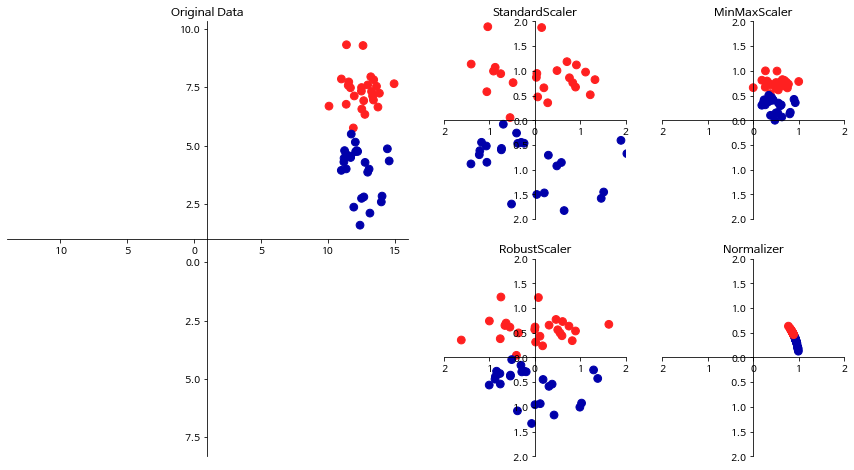

In [5]:
import mglearn
mglearn.plots.plot_scaling()

##### (가) StandardScaler - 표준화
    (가) 각 특성(feature)의 평균을 0, 분산을 1로 변경
    (나) 이 방법은 feature(특성)의 최솟값과 최댓값 크기를 제한하지 않는다.
##### (나) RobustScaler
    (가) 같은 스케일을 갖는다. StandardScaler과 비슷
    (나) 이 방법은 평균과 분산 대신 중간 값(median)과 사분위 값(quantile)을 사용.
         --> 중앙값을 선택하므로 전체 데이터와 아주 동떨어진 데이터 포인트에 영향을 받지 않음.
##### (다) MinMaxScaler - 정규화
    (가) 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터를 변경.
##### (라) Normalizer
    (가) 유클리디안 길이가 1이 되도록 데이터 포인트를 조정.
    (나) 지름이 1인 원에 데이터 포인트를 투영한다.
         --> 정규화는 특성 벡터의 길이는 상관없고 데이터의 방향(또는 각도)만이 중요할 때 많이 사용.

#### 1-1-4 데이터 변환 실습
    데이터 셋 : cancer 데이터 (569개, 30열)

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
print("[cancer.keys()]  \n{}".format(cancer.keys()))
print("유방암 데이터의 형태 : {}".format(cancer.data.shape))

[cancer.keys()]  
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
유방암 데이터의 형태 : (569, 30)


In [7]:
# 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=77)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


##### MinMaxScaler를 이용

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [9]:
import numpy as np
# np.set_printoptions(precision=2)
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

##### 실제로 훈련 데이터의 스케일을 조정하려면, 스케일 객체의 transform 메서드를 사용.

In [10]:
X_train_s = scaler.transform(X_train)
print("변환전 후 크기 : {}".format(X_train.shape))
print("변환전 최대, 최소 : \n {}, {}".format(X_train.max(axis=0), 
                                      X_train.min(axis=0)))
print()
print("변환된 후 크기 : {}".format(X_train_s.shape))
print("변환후 최대, 최소 : \n {}, {}".format(X_train_s.max(axis=0), 
                                      X_train_s.min(axis=0)))

변환전 후 크기 : (426, 30)
변환전 최대, 최소 : 
 [28.110 39.280 188.500 2499.000 0.145 0.345 0.427 0.201 0.304 0.096 2.873
 4.885 21.980 525.600 0.031 0.106 0.396 0.053 0.079 0.030 33.120 47.160
 220.800 3432.000 0.223 1.058 1.252 0.291 0.577 0.207], [7.691 10.380 47.920 170.400 0.053 0.019 0.000 0.000 0.106 0.050 0.117
 0.360 0.771 7.254 0.002 0.002 0.000 0.000 0.008 0.001 8.678 12.490 54.490
 223.600 0.071 0.027 0.000 0.000 0.157 0.055]

변환된 후 크기 : (426, 30)
변환후 최대, 최소 : 
 [1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
 1.000 1.000 1.000 1.000 1.000 1.000], [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000]


##### 변환전 후, 시각화

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


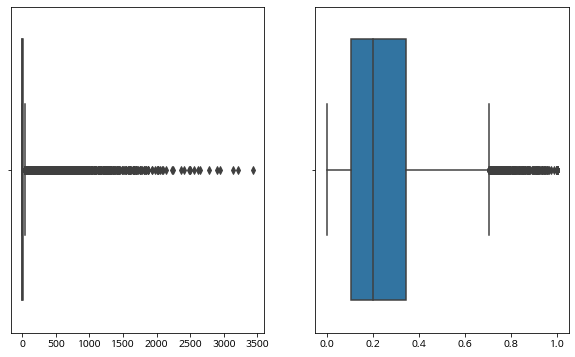

In [12]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.subplot(1,2,2)
sns.boxplot(X_train_s)

##### 메서드 단축해서 사용
    fit, transform를 -> fit_transform 메서드 사용하기

##### 표준화 수행

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 같은 내용 다른 방법
X_train_scaler = scaler.fit(X_train).transform(X_train)
X_train_scaler_d = scaler.fit_transform(X_train)

### fit().transform()과 fit_transform()과 같다.
print("변경전 :", X_train.max(), X_train.min() )
print("변경후 :", X_train_scaler.max(), X_train_scaler.min() )
print("변경후 :", X_train_scaler_d.max(), X_train_scaler_d.min() )

변경전 : 3432.0 0.0
변경후 : 11.587694680416146 -3.0966340529458245
변경후 : 11.587694680416146 -3.0966340529458245


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


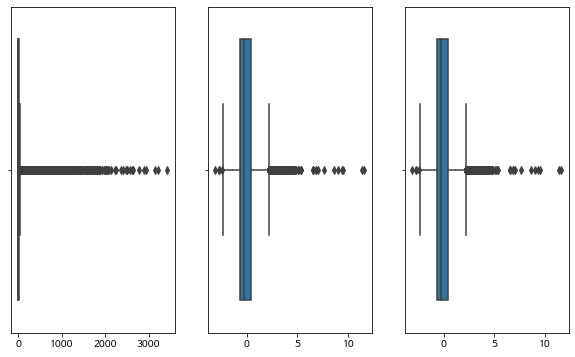

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(10,6))
sns.boxplot(X_train, ax=axes[0])
sns.boxplot(X_train_scaler, ax=axes[1])
sns.boxplot(X_train_scaler_d, ax=axes[2])

##### 학습용 데이터 셋과 테스트 데이터 셋을 같은 스케일을 적용해야 함.

In [15]:
### 한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

plt.rc('font', family='NanumBarunGothic') 

In [16]:
from sklearn.datasets import make_blobs

# 인위적인 데이터셋 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# 학습용 세트와 테스트 세트로 나눕니다
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

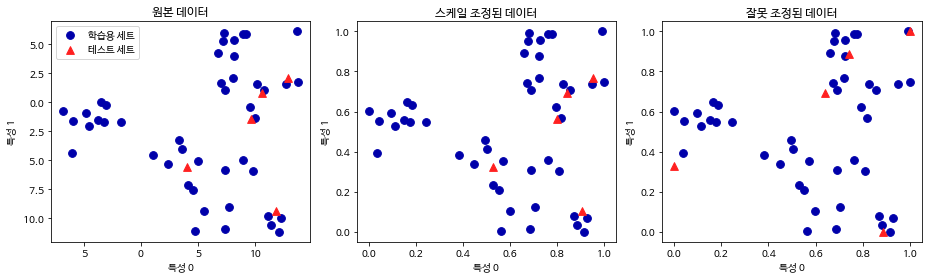

In [17]:
# 학습용 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="학습용 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# MinMaxScaler를 사용해 스케일을 조정합니다
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="학습용 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()

##### * 첫번째 그래프 원본 데이터
##### * 두번째 그래프 정상
##### * 세번째 그래프 - 각각 train, test에 대해서 fit를 이용하여 적용시킨다.
* MinMaxScaler()이 되면
* scaler = MinMaxScaler()
* test_scaler = MinMaxScaler()
       * scaler.fit(X_train)
       * test_scaler.fit(X_test)
* 원본 데이터와 다르게 표현됨.

### 　
### ch04 데이터 표현 특성공학

### 01 용어 이해해보기
#### 1-1. 연속형, 범주형 feature
* 데이터가 실수형 - 연속형 feature
* 데이터가 정해진 값 - 범주형 feature, 이산형 feature

#### 1-2. 특성 공학(feature engineering)
* 특정 애플리케이션의 가장 적합한 데이터 표현 찾기
* 올바른 데이터 표현은 지도학습 모델에서 적절한 매개변수를 선택하는 것보다 성능에 매우 중요.

#### 1-3. Label Encoding을 알아보기
* A. 머신러닝 알고리즘은 범주형 데이터에서 직접적으로 작동하지 않는다.
* B. 범주형 데이터는 숫자로 변경되어야 함.

      범주형 문자를 숫자로 변경해 주는 것.
      국가명이 만약 US, KR, UK, JPN등이라면 이를 숫자로 0,1,2,3로 변경해 준다.

* 파이썬 라이브러리 sklearn에서 LabelEncoder의 함수를 사용

#### 1-4. What is One Hot Encoding?(One Hot Encoding은 무엇인가?)
* 가. One Hot Encoding은 머신러닝 알고리즘에서 더 나은 예측을 위해 제공되는 하나의 과정입니다.
* 나. One-Hot Encoding은 범주형 변수를 바이너리벡터(0,1)로 표현한 것.
* 다. Label Encoding이 범주형 구분을 숫자로 변경하는 것이라면, OneHotEncoding은 

       KR  => ( 1 , 0, 0, 0 )
       US  => ( 0, 1, 0, 0 )
       UK  => ( 0, 0, 1, 0 )
       CN  => ( 0 , 0, 0, 1 ) 
로 벡터의 요소로 변경하는 것이다.
* 원핫인코딩을 다른말로 가변수(dummy variable)라고도 한다.
* 가변수는 범주형 변수를 0 또는 1값을 하나 이상의 새로운 특성으로 변경한 값이다.

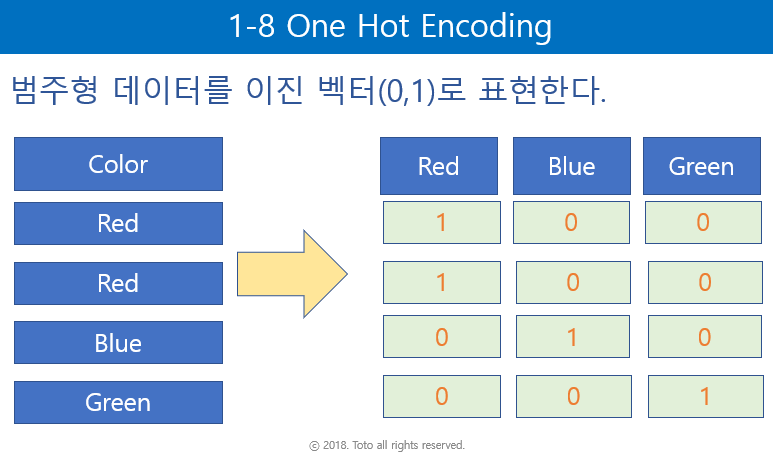

In [18]:
from IPython.display import display, Image
display(Image(filename='onehotencoding.png'))

##### 1-5. Why do you need one hot encoding? (왜 필요할까?)
    Label 인코딩에 오류 부분(순서 개념이 있을 수 있음) 보완
##### Label 인코딩의 오류
    Label 의 인코딩의 문제는 범주값이 높을수록 카테고리가 더 우수하다고 가정합니다.

    (가) 범주형 값에 의해 가장 가치 있는 모델은 값이 높은 값이 가치있다고 생각합니다.
          VW > Acura > Honda이다.
          - 이 내용은 오류가 발생합니다. 이 값을 가지고 모델을 예측한다는 것은 많은 오류가 있다.
    (나) 하지만 순서가 없을 경우, 문제가 될 수 있습니다.
          - (dog, cat, bird..)
    (다) 이 경우, 표현력이 있는 one-hot encoding를 이용하면 더 정밀한 예측이 가능해 질 수 있다.


#### 02 왜 사용하나?
* 머신러닝이나 딥러닝 적용시에 문자를 이해가 어렵기에 해당 모델에 맞는 형태(숫자나 벡터로)로 만들어주어야 한다.

#### 03 레이블 인코딩, 원핫 인코딩 실습해 보기(1)

In [19]:
### 01. 데이터 준비
import pandas as pd
data = { "eng": ["b", "c", "a", "d"] }
df = pd.DataFrame(data)
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,eng
0,b
1,c
2,a
3,d


In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

##### LabelEncoder 사용하기
     LabelEncoder()
        [].fit_transform([적용할열])

In [21]:
en_x = LabelEncoder()
df['라벨인코딩'] = en_x.fit_transform(df['eng'])
df

,eng,라벨인코딩
0,b,1
1,c,2
2,a,0
3,d,3


##### 데이터를 전처리
    OneHotEncoder() 적용을 위해 행렬로 변경
##### 원핫 인코딩(OneHotEncoding) 실습
    OneHotEncoder()
        [].fit_transform([적용할열])

In [22]:
df['라벨인코딩'].values

array([1, 2, 0, 3])

In [23]:
onehot = OneHotEncoder()
val = df['라벨인코딩'].values.reshape(-1,1) # OneHotEncoder()를 사용을 위한 적합한 값으로 변경.
y = onehot.fit_transform( val ).toarray()    # 값을 변경후, 배열로 만들어준다.
y

array([[0.000, 1.000, 0.000, 0.000],
       [0.000, 0.000, 1.000, 0.000],
       [1.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 1.000]])

In [24]:
onehot_val = pd.DataFrame(y, dtype=int)
onehot_val

,0,1,2,3
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1


In [25]:
df_new = pd.concat([df, onehot_val], axis=1)
df_new

,eng,라벨인코딩,0,1,2,3
0,b,1,0,1,0,0
1,c,2,0,0,1,0
2,a,0,1,0,0,0
3,d,3,0,0,0,1


#### 04 레이블 인코딩, 원핫 인코딩 실습해 보기(2)

In [26]:
data = { "회사명": ["MS","Apple", "Google", "Google"]}
df1 = pd.DataFrame(data)
df2 = df1.copy()
df2

,회사명
0,MS
1,Apple
2,Google
3,Google


In [27]:
### OneHotEncoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [28]:
df1['회사명']

0        MS
1     Apple
2    Google
3    Google
Name: 회사명, dtype: object

In [29]:
### LabelEncoder
encoder_x = LabelEncoder()
df1['lbl_en'] = encoder_x.fit_transform(df1['회사명'])  # 
df1


,회사명,lbl_en
0,MS,2
1,Apple,0
2,Google,1
3,Google,1


In [30]:
df1['lbl_en'].values

array([2, 0, 1, 1])

##### OneHotEncoding

In [31]:
onehot = OneHotEncoder()
y = onehot.fit_transform(df1['lbl_en'].values.reshape(-1,1) ).toarray()
print(y)

[[0.000 0.000 1.000]
 [1.000 0.000 0.000]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]]


In [32]:
# 변경된 값을 DataFrame형태로 변경
dx = pd.DataFrame(y, dtype=int)
dx

,0,1,2
0,0,0,1
1,1,0,0
2,0,1,0
3,0,1,0


In [33]:
df1_new = pd.concat([df1, dx], axis=1)
df1_new

,회사명,lbl_en,0,1,2
0,MS,2,0,0,1
1,Apple,0,1,0,0
2,Google,1,0,1,0
3,Google,1,0,1,0


#### 05 Keras를 활용한 원핫 인코딩
    케라스에서는 one hot encode를 위해 to_categorical() 함수를 제공한다.

In [34]:
from tensorflow.keras.utils import to_categorical
import numpy as np

# define example
data = [15,17,5,10,0]
dat = np.array(data)
print(dat)

# one hot encode
encoded = to_categorical(dat)
print(encoded)

[15 17  5 10  0]
[[0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000 1.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000 0.000 0.000 1.000]
 [0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000
  0.000 0.000 0.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
  0.000 0.000 0.000 0.000 0.000 0.000]]


In [35]:
# invert encoding
inverted = np.argmax(encoded[1])
print(inverted)

17


##### 실습
    집을 선택할 때, 다음과 같은 유형의 조건이 있다. Inside, Corner, FR2, CulDSac 이에 대한 정보를 레이블 인코딩, OneHotEncoding를 해보자.

#### 06. Pandas를 활용한 원핫 인코딩

In [36]:
import pandas as pd
import os

In [37]:
demo_df = pd.DataFrame({"범주형_feature":['양말', '여우', '양말', '상자']})
display(demo_df)

,범주형_feature
0,양말
1,여우
2,양말
3,상자


In [38]:
onehot = pd.get_dummies(demo_df)
onehot

,범주형_feature_상자,범주형_feature_양말,범주형_feature_여우
0,0,1,0
1,0,0,1
2,0,1,0
3,1,0,0


In [39]:
df = pd.concat([demo_df, onehot], axis=1)
df

,범주형_feature,범주형_feature_상자,범주형_feature_양말,범주형_feature_여우
0,양말,0,1,0
1,여우,0,0,1
2,양말,0,1,0
3,상자,1,0,0


##### 과제
* 내가 좋아하는 과일을 딕셔너리 형태로 만들고, 이를 원핫 인코딩으로 만들어 보자.

      scikit-learn의 클래스 활용하기
      keras를 활용해 보기
      pandas를 활용해 보기

### 원핫 인코딩 실습
### 01 원핫 인코딩 실습
    * 데이터 셋을 불러와 원핫 인코딩 실습
    * hello world 원핫 인코딩 실습

In [40]:
import mglearn
import pandas as pd
import os

In [41]:
demo_df = pd.DataFrame({"Product":['양말', '여우', '양말', '상자']})
display(demo_df)

,Product
0,양말
1,여우
2,양말
3,상자


In [42]:
onehot = pd.get_dummies(demo_df)
onehot

,Product_상자,Product_양말,Product_여우
0,0,1,0
1,0,0,1
2,0,1,0
3,1,0,0


In [43]:
df = pd.concat([demo_df, onehot], axis=1)
df

,Product,Product_상자,Product_양말,Product_여우
0,양말,0,1,0
1,여우,0,0,1
2,양말,0,1,0
3,상자,1,0,0


#### 02. adult.data 셋을 활용한 onehot encoding 실습

In [44]:
path = os.path.join(mglearn.datasets.DATA_PATH, 'adult.data')
print(path)

/usr/local/lib/python3.7/dist-packages/mglearn/data/adult.data


In [45]:
data = pd.read_csv(path,
               header=None, 
               index_col=False,
     names=['age', 'workclass', 'fnlwgt', 'education', 
            'education-num', 'marital-status', 'occupation', 'relationship', 
            'race', 'gender', 'capital-gain', 'capital-loss', 
            'hours-per-week', 'native-country', 'income'])

In [46]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

##### 일부 변수 선택 후, 진행

In [47]:
sel = ['age', 'workclass','education','gender','hours-per-week',
       'occupation','income']
data = data[sel]
data.head()


,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


##### 의미 있는 범주형 데이터 있는지 확인

In [48]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


##### pandas에서 get_dummies 함수를 이용하여 인코딩

In [49]:
print("원본 특성 :\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후 특성 : \n", list(data_dummies.columns))

원본 특성 :
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후 특성 : 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation

     age와 hours-per-week는 그대로이지만 범주형 특성은 새로운 특성으로 확장

##### 특성을 포함한 열 'age'~'occupation_ Transport-moving' 모두 추출

In [50]:
features = data_dummies.loc[:, "age":"occupation_ Transport-moving"]
X = features.values
y = data_dummies['income_ >50K'].values

In [51]:
print("X.shape : {}, y.shape : {}".format(X.shape, y.shape))

X.shape : (32561, 44), y.shape : (32561,)


##### 실습 1
* 로지스틱 모델을 만들어보기

       (1) 데이터를 나누어준다.
       (2) 모델을 만든다.
       (3) 모델을 학습한다.(학습 데이터를 이용해서)
       (4) score를 확인(테스트 데이터를 이용해서)

##### 로지스틱 모델 사용해 보기

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("테스트 점수 {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수 0.81


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### 01. 기본 실습 - One-hot encoding

     간단한 데이터를 준비하여, 목표 feature인 'target'를 labelencode 후, 이 후, 결과값을 이용하여 one-hot-encoding를 수행한다.

In [53]:
### 01. 데이터 준비
import pandas as pd
data = { "feature1":[2,3,8,4],
         "feature2":[22,32,82,42],
         "target": ["b","c", "a", "d"]
       }
df = pd.DataFrame(data)
df

,feature1,feature2,target
0,2,22,b
1,3,32,c
2,8,82,a
3,4,42,d


In [54]:
from sklearn import preprocessing

In [55]:
label_encoder = preprocessing.LabelEncoder()
df['lbl_en'] = label_encoder.fit_transform(df['target'])
df

,feature1,feature2,target,lbl_en
0,2,22,b,1
1,3,32,c,2
2,8,82,a,0
3,4,42,d,3


In [56]:
train_y = df['lbl_en'].values.reshape(len(df), 1)
train_y

array([[1],
       [2],
       [0],
       [3]])

In [57]:
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
train_y_onehot = onehot_encoder.fit_transform(train_y)
print(train_y_onehot)
print(train_y_onehot.shape)

[[0.000 1.000 0.000 0.000]
 [0.000 0.000 1.000 0.000]
 [1.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 1.000]]
(4, 4)


In [58]:
onehot_val = pd.DataFrame(train_y_onehot, dtype=int)
df_new = pd.concat([df, onehot_val], axis=1)
df_new

,feature1,feature2,target,lbl_en,0,1,2,3
0,2,22,b,1,0,1,0,0
1,3,32,c,2,0,0,1,0
2,8,82,a,0,1,0,0,0
3,4,42,d,3,0,0,0,1


#### 02. 사계절 원핫 인코딩

In [63]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data = ['spring', 'spring', 'summer', 'spring', 'autumn', 
        'autumn', 'winter', 'spring', 'summer', 'autumn']
values = array(data)
print(values)

['spring' 'spring' 'summer' 'spring' 'autumn' 'autumn' 'winter' 'spring'
 'summer' 'autumn']


**integer encode**가 정의되지 않았으므로 03 먼저 진행

### 03. 'hello world'를 원핫인코딩하기

In [64]:
import numpy as np
from numpy import argmax
# define input string
data = 'hello world'
print(data)

hello world


In [65]:
# define universe of possible input values
alphabet = 'abcdefghijklmnopqrstuvwxyz '
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

print("char_to_int : ", char_to_int)
print()
print("int_to_char : ", char_to_int)

char_to_int :  {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, ' ': 26}

int_to_char :  {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, ' ': 26}


In [66]:
# integer encode input data
integer_encoded = [char_to_int[char] for char in data]
print(integer_encoded)

[7, 4, 11, 11, 14, 26, 22, 14, 17, 11, 3]


In [67]:
# one hot encode
onehot_encoded = list()
for value in integer_encoded:
    letter = [0 for _ in range(len(alphabet))]
    letter[value] = 1
    onehot_encoded.append(letter)
    
print(onehot_encoded)

[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [68]:
# invert encoding
inverted = int_to_char[argmax(onehot_encoded[0])]
print(inverted)

h


### ch04 연속형 값을 구간 분할 해보기

#### 01 경고 메세지 설정 및 한글 설정

In [70]:
import os, warnings
# 경고 메시지 무시하거나 숨길때(ignore), 다시보이게(default)
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')

In [73]:
# 한글
import matplotlib
from matplotlib import font_manager, rc

plt.rc('font', family='NanumBarunGothic') 

#### 02 라이브러리 불러오기

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

#### 03 데이터 셋 준비 및 모델 예측 값의 시각화

In [75]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3,3, 1000, endpoint=False).reshape(-1,1)

print(X.shape)
print(y.shape)

(100, 1)
(100,)


#### 04 선형회귀 모델과 의사결정트리 모델로 학습 및 예측 수행

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

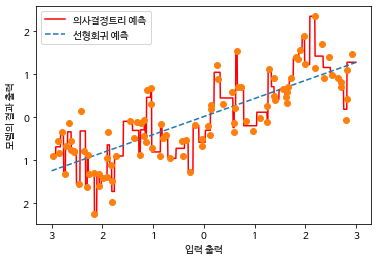

In [77]:
# 모델을 선택 및 학습 
linear = LinearRegression().fit(X, y)
decision = DecisionTreeRegressor(min_samples_split=3).fit(X, y)

# 실선으로 -3~3까지의 값을 데이터로 넣어 의사 결정트리 모델 예측
plt.plot(line, decision.predict(line), 'r-', label='의사결정트리 예측')

# 점선으로 -3~3까지의 값을 데이터로 넣어 회귀 모델 예측
plt.plot(line, linear.predict(line), '--', label='선형회귀 예측')

# 모델을 만들었던 데이터 찍겠다.
plt.plot(X[:, 0], y, 'o')

plt.ylabel("모델의 결과 출력")
plt.xlabel("입력 출력")
plt.legend(loc="best")

#### 05 구간 분할을 적용시켜 보자.
* 연속형 데이터에 아주 강력한 선형 모델 만드는 방법-구간 분할(bining)
* 구간의 대표값을 지정하여, 연속된 값을 구간값으로 변환하여 모델에 적용
* 함수 : KBinsDiscretizer 이용

In [78]:
bins = np.linspace(-3,3,11)
print("구간: {}".format(bins))

구간: [-3.000 -2.400 -1.800 -1.200 -0.600 0.000 0.600 1.200 1.800 2.400 3.000]


#### 구간 나누기

In [79]:
from sklearn.preprocessing import KBinsDiscretizer

In [80]:
kb = KBinsDiscretizer(n_bins=10, strategy="uniform")
kb.fit(X)
print("bin edges : \n", kb.bin_edges_ )

bin edges : 
 [array([-2.967, -2.378, -1.789, -1.200, -0.612, -0.023, 0.566, 1.155,
        1.744, 2.333, 2.921])                                        ]


      첫번째 구간은 -2.9668673~-2.37804741 모든 데이터 포인트를 담는다.
      두번째 구간은 -2.37804741~-1.78922951까지 모든 데이터 포인트를 포함.

##### 각각의 데이터를 구간에 매칭시키다.

In [81]:
X_binned = kb.transform(X)
X_binned

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [82]:
print(X[:10])  # 10개 데이터
X_binned[0:10].toarray()

[[-0.753]
 [2.704]
 [1.392]
 [0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [2.197]
 [0.607]
 [1.248]]


array([[0.000, 0.000, 0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        1.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 0.000,
        0.000],
       [0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000],
       [0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000],
       [1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000,
        0.000]])

    encode='onehot-dense'로 지정하여 원-핫-인코딩된 밀집 배열 만들기

In [83]:
kb = KBinsDiscretizer(n_bins=10, strategy="uniform", encode='onehot-dense') # {'onehot','onehot-dense', 'ordinal'}
kb.fit(X)
X_binned = kb.transform(X)
X_binned[0:10]

array([[0.000, 0.000, 0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        1.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 0.000,
        0.000],
       [0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000],
       [0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000],
       [1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000,
        0.000]])

In [84]:
print(X[:10])  # 10개 데이터
X_binned[:10]

[[-0.753]
 [2.704]
 [1.392]
 [0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [2.197]
 [0.607]
 [1.248]]


array([[0.000, 0.000, 0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        1.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 0.000,
        0.000],
       [0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000],
       [0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000],
       [1.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 0.000,
        0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000,
        0.000]])

In [85]:
print(X.shape, X_binned.shape)

(100, 1) (100, 10)


In [86]:
line = np.linspace(-3,3, 1000, endpoint=False).reshape(-1,1)
line[0:10]

array([[-3.000],
       [-2.994],
       [-2.988],
       [-2.982],
       [-2.976],
       [-2.970],
       [-2.964],
       [-2.958],
       [-2.952],
       [-2.946]])

In [87]:
from sklearn.tree import DecisionTreeRegressor

##### line(-3~3)의 값들을 구간분할로 적용하여 시각화
* reg = LinearRegression().fit(X_binned, y)
...
* reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)

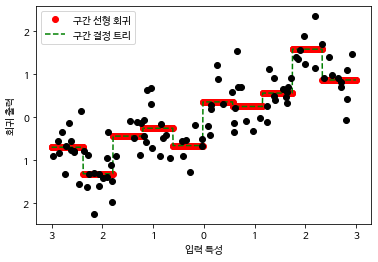

In [88]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), 'ro', label="구간 선형 회귀")   # 점

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), 'g--', label="구간 결정 트리")  # 점선

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

      * 선형 회귀 모델과 결정 트리가 같은 예측을 만들어냄.
      * 전에 비해 선형 모델이 상당히 유연해짐
      * 반면 결정트리는 특성의 값을 구간으로 나누는 것이 아무런 득이 없음.

#### 06 원본 특성을 곱하여 선형회귀 모델 표현
* 특성을 풍부하게 나타내는 한 방법으로 원본 데이터에 상호작용(interaction)과 다항식(polynomial)을 추가하는 것.

##### 원본 특성을 곱하여 선형 회귀 모델 표현

In [89]:
print(X.shape)
print(X_binned.shape)

(100, 1)
(100, 10)


In [90]:
np.min(line), np.max(line), line.shape

(-3.0, 2.9939999999999998, (1000, 1))

In [91]:
X.shape, X_binned.shape

((100, 1), (100, 10))

In [92]:
# 원본 데이터와 구간화된 데이터 결합
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)
X_combined[0:3]

(100, 11)


array([[-0.753, 0.000, 0.000, 0.000, 1.000, 0.000, 0.000, 0.000, 0.000,
        0.000, 0.000],
       [2.704, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000, 1.000],
       [1.392, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000,
        0.000, 0.000]])

In [93]:
line.shape, line_binned.shape

((1000, 1), (1000, 10))

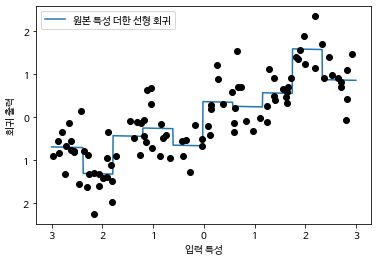

In [94]:
# 회귀 모델
reg = LinearRegression().fit(X_combined, y)

# line_binned = kb.transform(line)
line_combined = np.hstack([line, line_binned])

plt.plot(line, reg.predict(line_combined), label="원본 특성 더한 선형 회귀")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c='k')
plt.legend(loc="best")

(100, 20)
(1000, 1)
(1000, 10)


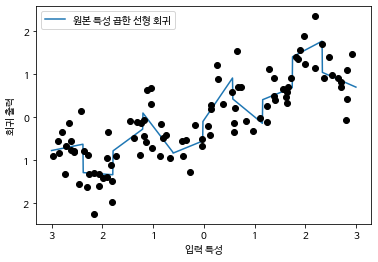

In [95]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

# 회귀 모델
reg = LinearRegression().fit(X_product, y)

# line_binned = kb.transform(line)
line_product = np.hstack([line_binned, line * line_binned])

print(line.shape)
print(line_binned.shape)


plt.plot(line, reg.predict(line_product), label="원본 특성 곱한 선형 회귀")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.plot(X[:, 0], y, 'o', c='k')

### ch04 비선형 변환

#### 01 비선형 변환
* 제곱항이나 세제곱 항을 추가하면 선형 회귀 모델에 도움이 된다.
* log, exp, sin 같은 수학 함수를 적용하는 방법도 특성 변환에 유용.
* 선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관되어 있음.
* log, exp 함수는 데이터의 스케일을 변경하여 선형 모델과 신경망을 올리는데 도움이 된다.

#### 02 실습을 통해 확인해 보기

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))  # 정규분포를 따르는 임의의 행렬 1000,3 만들기

# np.random.normal()  # 정규분포를 따르는 임의의 값을 가져오겠다.
# np.random.uniform()  # 균등 분포를 따르는 임의의 값을 가져오겠다.
print(X_org.shape)

w = rnd.normal(size=3)
print(w.shape)

(1000, 3)
(3,)


In [98]:
# 포아송 분포를 따르는 값 
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print("X, w : ", X.shape, w.shape)
print("y : ", y.shape)
print(X[:, 0])

X, w :  (1000, 3) (3,)
y :  (1000,)
[ 56  81  25  20  27  18  12  21 109   7  15   1  27   4   1   7   2  11
   6  18   1   2   2   7  31   7   7  28  37   9   8  21   7  20   3  71
  69  27   9   7  12  43   9  18   4  21  16  12 120  33   9   6  30   7
  25  27  40  15   2   5   7   3   5  42  10   7  87   5  19   4  24   8
  10  11   2   9   2   7   1   0   4   8  32   2  11  16   2   5   1   8
  13  19  13  68   2  21  20  12  10  16   5   7   1   3   1   9  10   3
   4 112  26   3   3  45   7  11  18   2   4   3  11  13  10   2  28  10
   8  14  14   3  23   3  24  28  18  17  13  27  56  10  23  11  24   5
  34  13  28   0  32   5   1  12   6  14   8  84   1   5  45   1  22   9
  47  14  29   9   2   9  10   1  25   2  17  60   0   6   0  12   0  10
  11  51  31   3  22  36   2  14   4  19  16  24   8  27   2   5   6  17
  11   6   1   9  15   5  25  15  21   8   8  53   6   4   4  38  28   5
   6   1  12   4   5  17   5  21   3  16  53  34   9   1  15   2   8  29
   1  84  36  2

In [99]:
### 각 값이 가지는 것에 대해 확인해 보기
print("값 출현 횟수(0~) :\n",np.bincount(X[:,0]))

값 출현 횟수(0~) :
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


       * 2가 68번으로 가장 많이 나타나며. 큰 값의 수는 빠르게 줄어든다.
       * 85, 86처럼 아주 큰 값도 약간은 있음

Text(0.5, 0, '값')

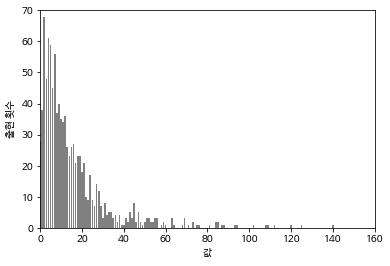

In [100]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

Text(0.5, 0, '값')

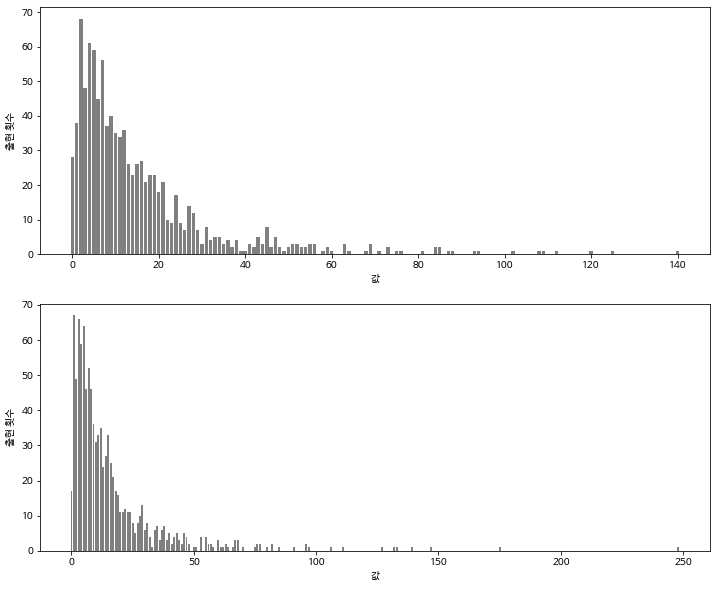

In [101]:
plt.figure(figsize=(12, 10))

plt.subplot(2,1,1)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

plt.subplot(2,1,2)
bins = np.bincount(X[:, 1])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

      X[:, 1]과 X[:, 2]의 특성도 비슷하다.

#### 03 주어진 데이터 활용한 리지 회귀(L1규제) 구현

In [102]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [103]:
X.shape, y.shape

((1000, 3), (1000,))

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수 : {:.3f}".format(score))

(750, 3) (250, 3) (750,) (250,)
테스트 점수 : 0.622


In [105]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, '값(log적용)')

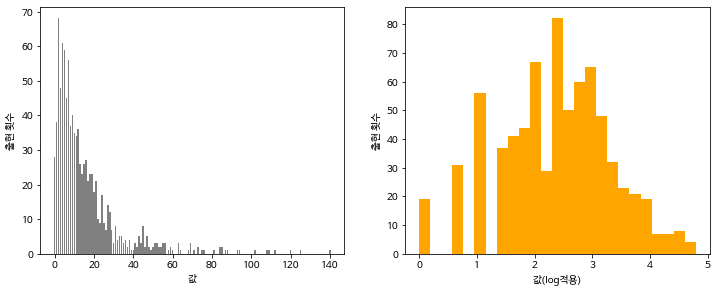

In [106]:
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

plt.subplot(2,2,2)
plt.hist( X_train_log[:, 0], bins=25, color='orange')
plt.ylabel("출현 횟수")
plt.xlabel("값(log적용)")

In [107]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.875


     * 결정계수의 값이 0.622에서 0.875로 향상되었다.
     * 선형모델, 나이브 베이즈 모델 같은 덜 복잡한 모델에서 구간 분할, 다항식, 상호작용은 데이터가 주어진 상황에서 모델의 성능에 큰 영향을 줄 수 있다.

### 새로운 특성(feature)를 선택하는 방법

#### 1-1-1 일변량 통계
* 개개의 특성과 타깃(목표변수) 사이에 중요한 통계적 관계가 있는지 계산
* 분류에서는 분산분석(ANOVA)라고 한다.
* 각 특성(feature)이 독립적으로 평가.
* 계산이 매우 빠르고 평가를 위한 모델을 만들 필요가 없음.
* SelectPercentile에서 특성을 선택하는 기준은 F-값. 값이 클수록 클래스 평균의 분산이 비교적 크다.

###### 분류 - f_classif, 회귀 - f_regression

In [108]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

In [109]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
import numpy as np

In [110]:
cancer = load_breast_cancer()
print(cancer.data.shape)

(569, 30)


In [111]:
# 고정된 난수를 발생
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 40))
noise.shape

(569, 40)

In [112]:
# 데이터 노이즈 특성 추가
# 30개는 원본 특성, 다음 40개는 노이즈
X_w_noise = np.hstack([cancer.data, noise])
X_w_noise.shape

(569, 70)

In [113]:
X = X_w_noise  # 입력
y = cancer.target # 출력

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0,
                                                    test_size=0.5)

# 50%를 뽑는 것을 학습
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)

SelectPercentile(percentile=50)

In [114]:
## 학습 세트에 적용
X_train_selected = select.transform(X_train)

print( "X_train.shape:", X_train.shape)
print( "X_train_selected.shape", X_train_selected.shape)

X_train.shape: (284, 70)
X_train_selected.shape (284, 35)


     결과를 통해 우리는 특징 개수가 70개에서 35개로 줄어든 것을 확인할 수 있음.

In [115]:
import matplotlib.pyplot as plt

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False False
 False False  True False False False False False  True False False False
 False False False False  True False False False False  True False False
  True False False False  True False False False  True  True]


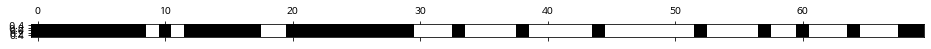

In [116]:
### 어떤 특성이 선택되었는지 확인
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

##### 30개의 원본 특성만 남고, 나머지 특성들은 거의 제거됨.
##### 전체 특성을 사용한 점수, 선택된 특성을 사용한 점수

In [117]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환 
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성 사용 : {:.3f}".format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print("선택된 일부 특성 사용 : {:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성 사용 : 0.937
선택된 일부 특성 사용 : 0.919


#### 1-1-2 모델 기반 특성 선택
* 지도 학습 머신러닝 모델을 사용하여 특성의 중요도를 평가해서 가장 중요한 특성들만 선택
* 특성 선택에 사용하는 지도 학습 모델은 최종적으로 사용할 지도학습 모델과 같을 필요는 없음.
* 결정트리와 유사한 모델은 featureimportance 속성을 제공함.
* 선형 모델의 절대값으로 특성의 중요도를 재는데 사용
* 모델 기반의 특성 선택은 SelectFromModel에 구현되어 있음.

In [118]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, 
                                               random_state=42),
                                               threshold="median")

* SelectFromModel은 지도학습 모델로 계산된 중요도가 임계치보다 큰 모든 특성을 선택
* 절반 가량의 특성이 선택될 수 있도록 중간값을 임계치로 사용.
* 트리 100개로 만든 랜덤 포레스트 분류기를 사용.

In [119]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape :" , X_train.shape)
print("X_train_l1.shape :", X_train_l1.shape)

X_train.shape : (284, 70)
X_train_l1.shape : (284, 35)


[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False False  True False False False  True False False
 False False False False  True False  True False False False False False
  True False False  True  True False False False  True False]


Text(0.5, 0, '특성 번호')

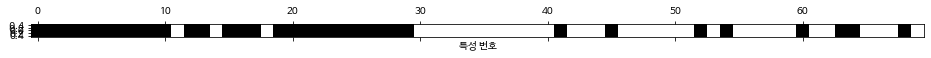

In [120]:
### 어떤 특성이 선택되었는지 확인
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")

In [121]:
# 테스트 데이터 변환 
X_test_l1 = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성 사용 : {:.3f}".format(lr.score(X_test, y_test)))

# score = LogisticRegression().fit(X_train, y_train).score(X_test_l1, y_test)

전체 특성 사용 : 0.937


#### 1-1-3 반복적 특성 선택
* 일변량 모델은 모델을 사용하지 않음.(F값)
* 모델 기반 선택은 하나의 모델을 사용
* 반복적 특성 선택(iterative Feature Selection)에서는 특성의 수가 각기 다른 일련의 모델이 만들어짐.
      하나, 특성을 하나도 선택하지 않은 상태로 시작해서 어떤 종료 조건까지 하나씩 추가
      둘, 모든 특성을 가지고 시작하여 어떤 종료 조건이 될때까지 특성을 하나씩 제거.
* 이 모델들은 앞서 소개한 방법들보다 계산 비용이 훨씬 많이 든다.
* 재귀적 특성 제거(RFE:recursive feature elimination)가 하나의 방법

Text(0.5, 0, '특성 번호')

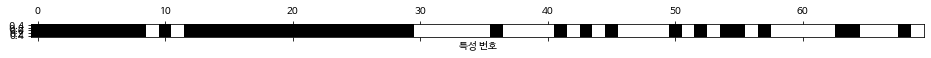

In [122]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
            n_features_to_select=40)

select.fit(X_train, y_train)

# 선택된 특성을 표시합니다.
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("특성 번호")

* 일변량 분석이나 모델 기반 특성보다 특성 선택이 나아짐.
* 랜덤 포레스트 모델은 특성이 누락될때마다 다시 학습하므로 40번 실행.
* 이 코드를 실행하면 모델 기반 선택보다 훨씬 오래 걸림.

In [123]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.923


In [124]:
### RFE에서 사용된 모델로 예측
print("테스트 점수 : {:.3f}".format(select.score(X_test, y_test)))

테스트 점수 : 0.933


### 중요한 특징(feature)를 선택하는 방법
* 통계가 좋은 특징 - 일변량 통계(univariate statistics)
* 모델을 통해 선택 - 모델 기반 선택(model-based selection)
* 모델을 통해 선택 - 반복적 선택(iterative selection)

#### 1-1-1 일변량 통계
* 개개의 특성과 타깃(목표변수) 사이에 중요한 통계적 관계가 있는지 계산
* 분류에서는 분산분석(ANOVA)라고 한다.
* 각 특성(feature)이 독립적으로 평가.
* 계산이 매우 빠르고 평가를 위한 모델을 만들 필요가 없음.
* SelectPercentile에서 특성을 선택하는 기준은 F-값
    * 값이 클수록 클래스 평균의 분산이 비교적 크다.

##### 평가 지표
* 분류는 f_classif를 사용하고 회귀는 f_regression를 사용한다.

In [125]:
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

In [126]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression, f_classif

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

In [127]:
boston = load_boston()

df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [128]:
# 입력 데이터와 출력데이터를 지정해준다.
X = df_boston.loc[ : , 'CRIM':'LSTAT']
y = boston.target
print("정규화, 확장 전 데이터 셋 : ", X.shape, y.shape)

정규화, 확장 전 데이터 셋 :  (506, 13) (506,)


In [129]:
## 값을 전체적으로 0~1로 사이로 만들기 
nor_X = MinMaxScaler().fit_transform(X)
nor_X.min(), nor_X.max()

(0.0, 1.0)

In [130]:
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(nor_X)
print( ex_X.shape, type(ex_X) )

(506, 104) <class 'numpy.ndarray'>


##### 정규화와 특징 생성 후, 데이터 나누기

In [131]:
X = ex_X          # 입력
y = boston.target # 출력

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=0,
                                                    test_size=0.5)

# 50%를 뽑는 것을 학습
select = SelectPercentile(score_func=f_regression, percentile=50)
select.fit(X_train, y_train)

SelectPercentile(percentile=50,
                 score_func=<function f_regression at 0x7f68b31d5d40>)

In [132]:
## 학습 세트에 적용
X_tr_selected = select.transform(X_train)

print( "X_train.shape:", X_train.shape)
print( "X_train_selected.shape", X_tr_selected.shape)

X_train.shape: (253, 104)
X_train_selected.shape (253, 52)


* 결과를 통해 우리는 특징 개수가 104개에서 52개로 줄어든 것을 확인할 수 있음.

##### 어떤 특징이 선택 되었는지 시각화를 통해 확인

In [133]:
import matplotlib.pyplot as plt

[ True  True  True False  True  True False False False  True  True False
  True False False  True False  True False  True  True False  True  True
 False  True False False False  True  True  True False False False False
  True False  True False  True False  True False  True  True  True False
  True False False False False False False False False False False  True
 False  True False  True  True  True False  True  True False  True False
 False False  True  True  True False  True  True  True False  True False
 False False False False False  True  True  True False  True  True  True
 False  True  True False  True False  True  True]


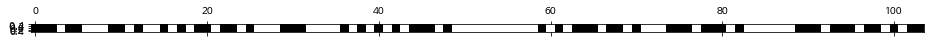

In [134]:
### 어떤 특성이 선택되었는지 확인
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

##### 전체 특성을 사용한 점수, 선택된 특성을 사용한 점수

In [135]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("전체 특성 사용 : {:.3f}".format(lr.score(X_test, y_test)))

전체 특성 사용 : 0.664


In [136]:
# 테스트 데이터 변환 
X_test_selected = select.transform(X_test)

lr1 = LinearRegression()
lr1.fit(X_tr_selected, y_train)
print("선택된 일부 특성 사용 : {:.3f}".format(lr1.score(X_test_selected, y_test)))

선택된 일부 특성 사용 : 0.758


* 0.664에서 선택된 일부 특성(50%)를 선택 후, 성능이 0.758로 향상되었습니다.

#### 1-1-2 모델 기반 특성 선택
* 지도 학습 머신러닝 모델을 사용하여 특성의 중요도를 평가해서 가장 중요한 특성들만 선택
* 특성 선택에 사용하는 지도 학습 모델은 최종적으로 사용할 지도학습 모델과 같을 필요는 없음.
* 결정 트리와 유사한 모델은 featureimportance 속성을 제공함.
* 선형 모델의 절대값으로 특성의 중요도를 재는데 사용
* 모델 기반의 특성 선택은 SelectFromModel에 구현되어 있음.

In [137]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [138]:
select = SelectFromModel(RandomForestRegressor(n_estimators=100, 
                                               random_state=42),
                                               threshold="median")  # 1.25*mean, 0.75*mean 

* SelectFromModel은 지도학습 모델(랜덤포레스트)로 계산된 중요도가 기준
* 임계치보다 큰 모든 특성을 선택
* 절반 가량의 특성이 선택될 수 있도록 중간값(threshold='median')을 임계치로 사용.
* 트리 100개로 만든 랜덤 포레스트 분류기를 사용.

In [139]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape :" , X_train.shape)
print("X_train_l1.shape :", X_train_l1.shape)

X_train.shape : (253, 104)
X_train_l1.shape : (253, 52)


[False False False False False  True False False False False False  True
  True False  True  True False  True  True  True False False  True  True
 False  True False  True False False False False False False False False
 False False False False  True False  True  True  True False  True  True
  True False False False False False False False False False False False
 False False  True False  True  True False  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True  True False False  True  True  True False  True
  True  True False  True  True False  True  True]


Text(0.5, 0, '특성 번호')

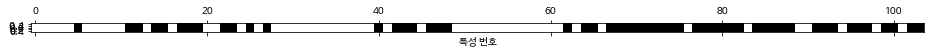

In [140]:
### 어떤 특성이 선택되었는지 확인
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")

In [141]:
# 학습용, 테스트 데이터 변환 
X_train_l1 = select.transform(X_train)
X_test_l1 = select.transform(X_test)

lr1 = LinearRegression()
lr1.fit(X_train_l1, y_train)
print("전체 특성 사용 : {:.3f}".format(lr1.score(X_test_l1, y_test)))

전체 특성 사용 : 0.770


* 위의 결과와 비교해 보면 SelectPercentile으로 선택한 것보다 성능이 좋음.

##### 1-1-3 반복적 특성 선택
* A. 일변량 모델은 모델을 사용하지 않음.(F값)
* B. 모델 기반 선택은 하나의 모델을 사용
* C. 반복적 특성 선택(iterative Feature Selection)에서는 특성 선택 시, 각각 다른 모델을 사용.
      하나, 특성을 하나도 선택하지 않은 상태로 시작해서 어떤 종료 조건까지 하나씩 추가
      둘, 모든 특성을 가지고 시작하여 어떤 종료 조건이 될때까지 특성을 하나씩 제거.
* D. 많은 모델 사용하므로 앞서 소개한 방법들보다 계산 비용이 훨씬 많이 든다.
* 재귀적 특성 제거(RFE:recursive feature elimination)가 하나의 방법

In [142]:
from sklearn.feature_selection import RFE

CPU times: user 49.9 s, sys: 105 ms, total: 50 s
Wall time: 52 s


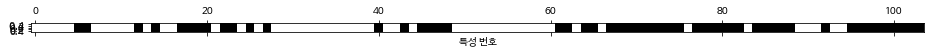

In [143]:
%%time

# RFE 반복적인 변수의 제거를 통해 좋은 피처만 남긴다.
select = RFE(RandomForestRegressor(n_estimators=100, random_state=42),
            n_features_to_select=52)

select.fit(X_train, y_train)

# 선택된 특성을 표시합니다.
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("특성 번호")

* 일변량 분석이나 모델 기반 특성보다 특성 선택이 나아짐.
* 랜덤 포레스트 모델은 특성이 누락될때마다 다시 학습하므로 52번 실행.
* 이 코드를 실행하면 모델 기반 선택보다 훨씬 오래 걸림.

In [144]:
X_tr_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

In [145]:
score = LinearRegression().fit(X_tr_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수 : {:.3f}".format(score))

테스트 점수 : 0.799


##### 최종 확인 결과
* F통계량, 랜덤포레스트 특성 중요도 이용, RFE 이용하여 확인한 결과
       RFE > RandomForestRegressor 특성 이용 > 통계량 이용 순으로 성능이 차이가 있었다.

In [146]:
### RFE에서 사용된 모델로 예측
model = LinearRegression().fit(X_tr_rfe, y_train)
print("최종 모델 테스트 점수 : {:.3f}".format(model.score(X_test_rfe, y_test)))

최종 모델 테스트 점수 : 0.799
